In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import json
from datetime import date, timedelta
import math
np.random.seed(seed=42)
# plt.rcParams['text.usetex'] = True
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set_style("whitegrid", rc={'font.family': 'Times New Roman', 'font.size': 16})
plt.rc('legend',fontsize=16)
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style("whitegrid", rc={'font.size': 16})

from constants import LOCATION_CHOOSEN, LOCATION_CHOOSEN_2, OUTPUT_DIR, DATA_CACHE_DIR, OPTIMAL_VALUES_FILE, STRINGENCY_BASED_GDP

In [2]:
data_path = os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_merged_data.csv")
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
else:
    df = pd.read_excel("owid-covid-data.xlsx")
    df = df.loc[df['iso_code'] == LOCATION_CHOOSEN]
    df.to_csv(data_path, index=False)

In [3]:
start_date = date(2020, 5, 1)
end_date = date(2022, 11, 1)
# end_date = date(2023, 7, 1)
delta = timedelta(days=1)

worldometers_dates = []
worldometers_total_cases = []
worldometers_total_recovered = []
worldometers_active_cases = []

while start_date <= end_date:
    date_str = start_date.strftime("%Y%m%d")
    data_path_worldometer = os.path.join(DATA_CACHE_DIR, "worldometer", date_str + ".csv")
    if os.path.exists(data_path_worldometer):
        worldometer_df = pd.read_csv(data_path_worldometer)
        worldometer_df.columns = ['country' if col.startswith('Country') else col for col in worldometer_df.columns]
        worldometer_df.columns = worldometer_df.columns.str.lower().str.replace(' ', '')
        date_data = ""
        total_cases = 0
        total_recovered = 0
        worldometer_df_specified_location = worldometer_df.loc[(worldometer_df["country"].str.lower() == LOCATION_CHOOSEN_2.lower())]
        date_data = date_str[:4] + "-" + date_str[4:6] + "-" + date_str[6:]
        total_cases = 0.0 if math.isnan(worldometer_df_specified_location["totalcases"].item()) else worldometer_df_specified_location["totalcases"].item()
        active_cases = 0.0 if math.isnan(worldometer_df_specified_location["activecases"].item()) else worldometer_df_specified_location["activecases"].item()
        total_recovered = 0.0 if math.isnan(worldometer_df_specified_location["totalrecovered"].item()) else worldometer_df_specified_location["totalrecovered"].item()
        print(date_data, total_cases, total_recovered, type(total_recovered), math.isnan(total_recovered))
        worldometers_dates.append(date_data)
        worldometers_total_cases.append(total_cases)
        worldometers_total_recovered.append(total_recovered)
        worldometers_active_cases.append(active_cases)
    else:
        print(data_path_worldometer, "DOES NOT EXIST -- COLLECT DATA MANUALLY")
    start_date += delta

2020-05-01 35043 9068.0 <class 'float'> False
2020-05-02 37257 10007.0 <class 'float'> False
2020-05-03 42505 11775.0 <class 'float'> False
2020-05-04 42670 11782.0 <class 'float'> False
2020-05-05 49400 14142.0 <class 'float'> False
2020-05-06 52987 15331.0 <class 'float'> False
2020-05-07 53045 15331.0 <class 'float'> False
2020-05-08 56516 16867.0 <class 'float'> False
2020-05-09 62808 19301.0 <class 'float'> False
2020-05-10 62939 19358.0 <class 'float'> False
2020-05-11 70768 22549.0 <class 'float'> False
2020-05-12 74243 24420.0 <class 'float'> False
2020-05-13 78055 26400.0 <class 'float'> False
2020-05-14 81990 27969.0 <class 'float'> False
2020-05-15 82103 27977.0 <class 'float'> False
2020-05-16 90615 34220.0 <class 'float'> False
2020-05-17 95648 36794.0 <class 'float'> False
2020-05-18 95698 36795.0 <class 'float'> False
2020-05-19 101261 39233.0 <class 'float'> False
2020-05-20 106475 42309.0 <class 'float'> False
2020-05-21 118226 48553.0 <class 'float'> False
2020-05-22 

2020-10-31 8137119 7432829.0 <class 'float'> False
2020-11-01 8184082 7491513.0 <class 'float'> False
2020-11-02 8229322 7544798.0 <class 'float'> False
2020-11-03 8267623 7603121.0 <class 'float'> False
2020-11-04 8313876 7656478.0 <class 'float'> False
2020-11-05 8364086 7711809.0 <class 'float'> False
2020-11-06 8411724 7765966.0 <class 'float'> False
2020-11-07 8462080 7819886.0 <class 'float'> False
2020-11-08 8507754 7868968.0 <class 'float'> False
2020-11-09 8553864 7917373.0 <class 'float'> False
2020-11-10 8591730 7959406.0 <class 'float'> False
2020-11-11 8636011 8013783.0 <class 'float'> False
2020-11-12 8684039 8064548.0 <class 'float'> False
2020-11-13 8737746 8122580.0 <class 'float'> False
2020-11-14 8773479 8163572.0 <class 'float'> False
2020-11-15 8814902 8205728.0 <class 'float'> False
2020-11-16 8845617 8249579.0 <class 'float'> False
2020-11-17 8900008 8318778.0 <class 'float'> False
2020-11-18 8912907 8335109.0 <class 'float'> False
2020-11-19 8960098 8383602.0 <c

2021-05-06 21242580 17407470 <class 'int'> False
2021-05-07 21491598 17612351 <class 'int'> False
2021-05-08 21892676 17930960 <class 'int'> False
2021-05-09 22296414 18317404 <class 'int'> False
2021-05-10 22662575 18671222 <class 'int'> False
2021-05-11 22992517 19027304 <class 'int'> False
2021-05-12 23340938 19382642 <class 'int'> False
2021-05-13 23703665 19734823 <class 'int'> False
2021-05-14 24046809 20079599 <class 'int'> False
2021-05-15 24372907 20432898 <class 'int'> False
2021-05-16 24684077 20795335 <class 'int'> False
2021-05-17 24965463 21174076 <class 'int'> False
2021-05-18 25228996 21596512 <class 'int'> False
2021-05-19 25771405 22348683 <class 'int'> False
2021-05-20 26030024 22705590 <class 'int'> False
2021-05-21 26031991 22712735 <class 'int'> False
2021-05-22 26285069 23059017 <class 'int'> False
2021-05-23 26530132 23425467 <class 'int'> False
2021-05-24 26946102 24044364 <class 'int'> False
2021-05-25 27122158 24278735 <class 'int'> False
2021-05-26 27156382 

2021-10-22 34143236 33514449.0 <class 'float'> False
2021-10-23 34159562 33532126.0 <class 'float'> False
2021-10-24 34175468 33548605.0 <class 'float'> False
2021-10-25 34189774 33567367.0 <class 'float'> False
2021-10-26 34202202 33583318.0 <class 'float'> False
2021-10-27 34215653 33597339.0 <class 'float'> False
2021-10-28 34231809 33614434.0 <class 'float'> False
2021-10-29 34246157 33627632.0 <class 'float'> False
2021-10-30 34260470 33641175.0 <class 'float'> False
2021-10-31 34275364 33655842.0 <class 'float'> False
2021-11-01 34285814 33668560.0 <class 'float'> False
2021-11-02 34285814 33668560.0 <class 'float'> False
2021-11-03 34308140 33697740.0 <class 'float'> False
2021-11-04 34320142 33704365.0 <class 'float'> False
2021-11-05 34344087 33728923.0 <class 'float'> False
2021-11-06 34354966 33740926.0 <class 'float'> False
2021-11-07 34354966 33740926.0 <class 'float'> False
2021-11-08 34366614 33753488.0 <class 'float'> False
2021-11-09 34374455 33763237.0 <class 'float'>

2022-04-18 43044280 42510773.0 <class 'float'> False
2022-04-19 43045527 42511701.0 <class 'float'> False
2022-04-20 43047594 42513248.0 <class 'float'> False
2022-04-21 43049974 42514479.0 <class 'float'> False
2022-04-22 43052425 42516068.0 <class 'float'> False
2022-04-23 43054952 42517724.0 <class 'float'> False
2022-04-24 43059821 42519479.0 <class 'float'> False
2022-04-25 43060086 42521341.0 <class 'float'> False
2022-04-26 43065666 42523311.0 <class 'float'> False
2022-04-27 43065666 42525563.0 <class 'float'> False
2022-04-28 43068799 42528126.0 <class 'float'> False
2022-04-29 43072486 42530622.0 <class 'float'> False
2022-04-30 43075864 42533377.0 <class 'float'> False
2022-05-01 43079188 42536253.0 <class 'float'> False
2022-05-02 43082502 42536253.0 <class 'float'> False
2022-05-03 43085166 42541887.0 <class 'float'> False
2022-05-04 43088401 42544689.0 <class 'float'> False
2022-05-05 43091393 42547699.0 <class 'float'> False
2022-05-06 43094548 42547699.0 <class 'float'>

2022-10-17 44630888 44075149.0 <class 'float'> False
2022-10-18 44632430 44077068.0 <class 'float'> False
2022-10-19 44634376 44079485.0 <class 'float'> False
2022-10-20 44638011 44082064.0 <class 'float'> False
2022-10-21 44638636 44084646.0 <class 'float'> False
2022-10-22 44640748 44087748.0 <class 'float'> False
2022-10-23 44642742 44090349.0 <class 'float'> False
2022-10-24 44644076 44091906.0 <class 'float'> False
2022-10-25 44644938 44093409.0 <class 'float'> False
2022-10-26 44645768 44095180.0 <class 'float'> False
2022-10-27 44646880 44097072.0 <class 'float'> False
2022-10-28 44649088 44100691.0 <class 'float'> False
2022-10-29 44650714 44102852.0 <class 'float'> False
2022-10-30 44652266 44104933.0 <class 'float'> False
2022-10-31 44653592 44106656.0 <class 'float'> False
2022-11-01 44654638 44107943.0 <class 'float'> False


In [4]:
worldometer_df = pd.DataFrame({"date": worldometers_dates, "total_cases_worldometer": worldometers_total_cases, "total_recovered_worldometer": worldometers_total_recovered, "active_cases_worldometer": worldometers_active_cases})
result = pd.merge(df, worldometer_df, on="date")
df = result

df['date'] = pd.to_datetime(df['date'])

In [5]:
df

,date,stringency_index,total_cases,total_deaths,total_vaccinations,population,people_fully_vaccinated,gdp_normalized,gdp_normalized_modelled,total_cases_worldometer,total_recovered_worldometer,active_cases_worldometer
0,2020-05-01,96.30,35043.0,1147.0,0.000000e+00,1.417173e+09,7668.0,83.905433,88.264410,35043,9068.0,24821.0
1,2020-05-02,96.30,37336.0,1218.0,0.000000e+00,1.417173e+09,7668.0,84.041307,88.264410,37257,10007.0,26027.0
2,2020-05-03,96.30,39980.0,1301.0,0.000000e+00,1.417173e+09,7668.0,84.177181,88.264410,42505,11775.0,29339.0
3,2020-05-04,81.94,42533.0,1373.0,0.000000e+00,1.417173e+09,7668.0,84.313055,94.904432,42670,11782.0,29493.0
4,2020-05-05,81.94,46433.0,1568.0,0.000000e+00,1.417173e+09,7668.0,84.448930,94.904432,49400,14142.0,33565.0
...,...,...,...,...,...,...,...,...,...,...,...,...
910,2022-10-28,31.48,44649088.0,528999.0,2.196044e+09,1.417173e+09,950032740.0,99.893668,99.063148,44649088,44100691.0,19398.0
911,2022-10-29,31.48,44650662.0,529008.0,2.196215e+09,1.417173e+09,950066782.0,99.898210,99.063148,44650714,44102852.0,18854.0
912,2022-10-30,31.48,44652266.0,529016.0,2.196336e+09,1.417173e+09,950090439.0,99.902753,99.063148,44652266,44104933.0,18317.0
913,2022-10-31,31.48,44653592.0,529024.0,2.196409e+09,1.417173e+09,950104356.5,99.907295,99.063148,44653592,44106656.0,17912.0


In [6]:
# deaths are considered recovered: https://www.kaggle.com/code/lisphilar/covid-19-data-with-sir-model/notebook?scriptVersionId=28560520
# https://lisphilar.github.io/covid19-sir/02_data_engineering.html#1.-Data-cleaning

# df['N'] = df['population']
# df['S'] = df['population'] - df['total_cases_worldometer'] - df['people_fully_vaccinated']
# df['I'] = df['total_cases_worldometer'] - df['total_recovered_worldometer'] - df['total_deaths']
# df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated'] + df['total_deaths']

# without deaths model
df['N'] = df['population']
df['S'] = df['population'] - df['total_cases_worldometer'] - df['people_fully_vaccinated'] - df['total_recovered_worldometer']
df['I'] = df['total_cases_worldometer'] - df['total_recovered_worldometer']
df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated']

2313.0


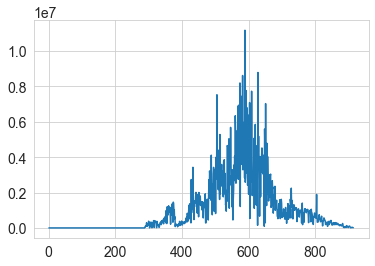

In [7]:
plt.plot( df['people_fully_vaccinated'].diff())
print(min(df['people_fully_vaccinated'].diff()[290:]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


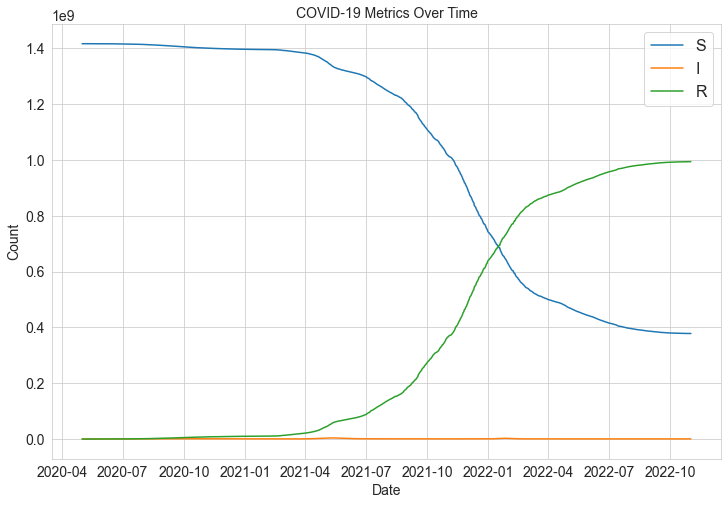

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['S'], label='S')
plt.plot(df['date'], df['I'], label='I')
plt.plot(df['date'], df['R'], label='R')
plt.title('COVID-19 Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "metrics_over_time_" + LOCATION_CHOOSEN + ".eps"))
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


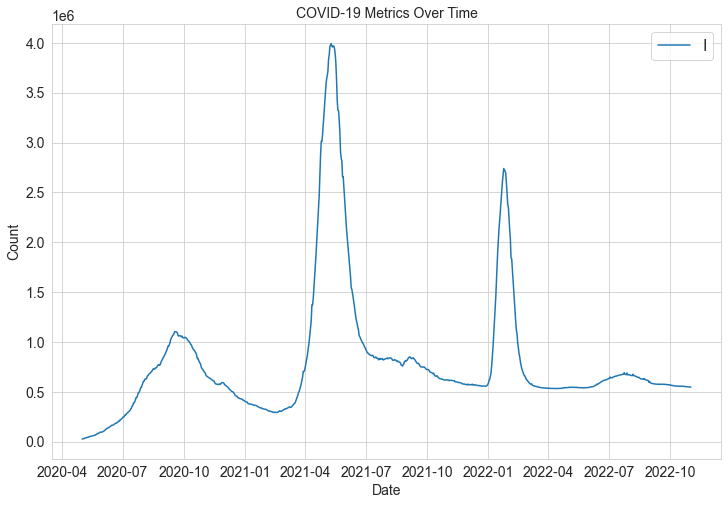

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['I'], label='I')
plt.title('COVID-19 Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "infected_over_time_" + LOCATION_CHOOSEN + ".eps"))
plt.show()

## SIR Model

In [10]:
# def compute_cost(data, predictions):
#     # mse
#     return np.square(data - predictions).mean()

# def compute_cost(data, predictions):
#     # mae
#     return np.abs(data - predictions).mean()

# def compute_cost(data, predictions):
#     # Relative Root Mean Squared Error
#     residual = data - predictions
#     root_mean_squared_error = np.sqrt(np.mean(np.square(residual)))
#     mean_data = np.mean(data)
#     return root_mean_squared_error / mean_data

def compute_cost(data, predictions, delta=1.0):
    # Huber loss
    residual = np.abs(data - predictions)
    condition = residual < delta
    squared_loss = 0.5 * np.square(residual)
    linear_loss = delta * (residual - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss).mean()

In [11]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma))
    return result

def objective_function(params, y0, t, N):
    predictions = integrate_system(params, y0, t, N)
    S, I, R = predictions.T
    cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) +  compute_cost(df['R'], R)
    return cost

In [12]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item() + 1, df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.4, 1/15 
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


optimal_beta: 0.04208479828695971 optimal_gamma: 0.02388356686032017
optimal_beta/optimal_gamma: 1.7620817917644795


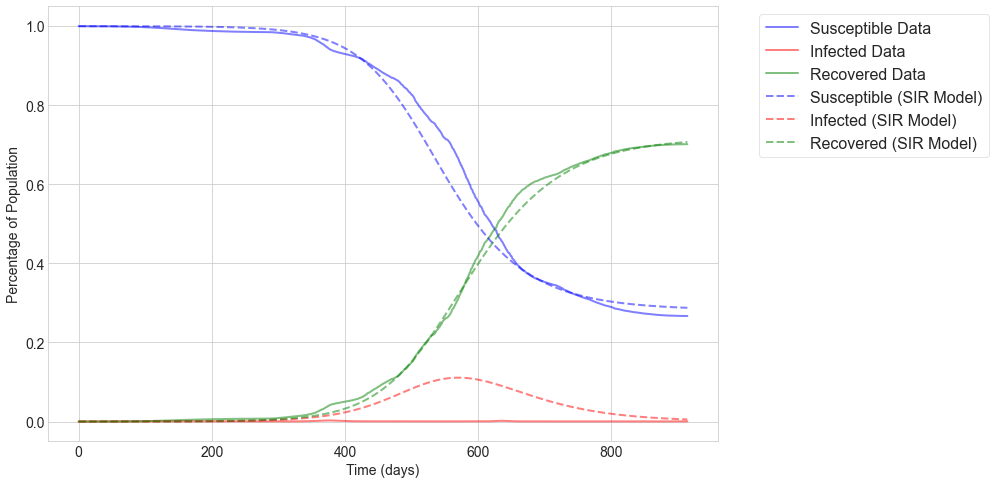

cost: 85051490.53250012


In [13]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (SIR Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (SIR Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (SIR Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

SIR_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIR_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


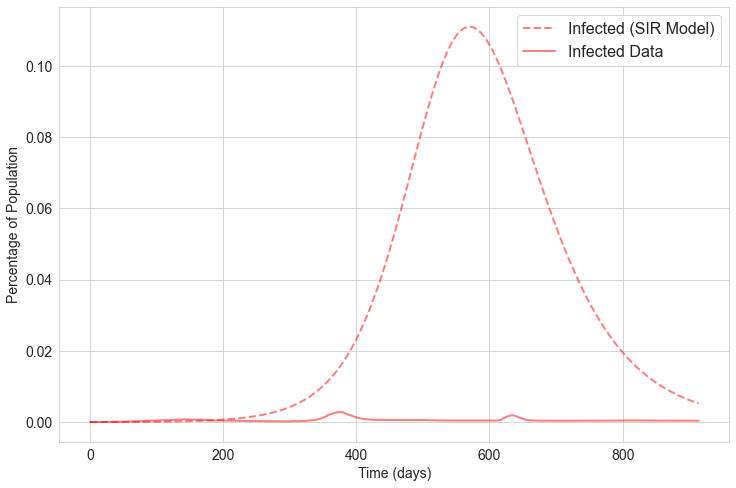

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (SIR Model)')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [15]:
r0 = optimal_beta/optimal_gamma

df["S_modelled"] = S
df["I_modelled"] = I
df["R_modelled"] = R
df["r_eff_modelled"] = r0 * df["S_modelled"]/N
df["r_eff_actual"] = r0 * df["S"]/df["N"]

## SIR Model with Lockdown

In [16]:
def deriv(y, t, N, beta, gamma, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, lockdown):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, lockdown))
    return result

def objective_function(params, y0, t, N, lockdown):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

In [17]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.2, 1./10 
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


optimal_beta: 0.4013340889432941 optimal_gamma: 0.09017476605499258
optimal_beta/optimal_gamma: 4.450625230328213


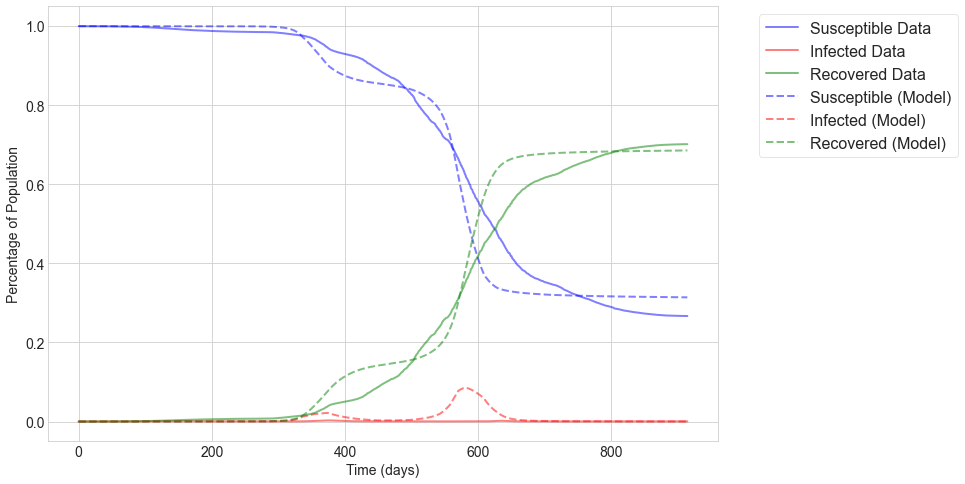

cost: 98438821.45587364


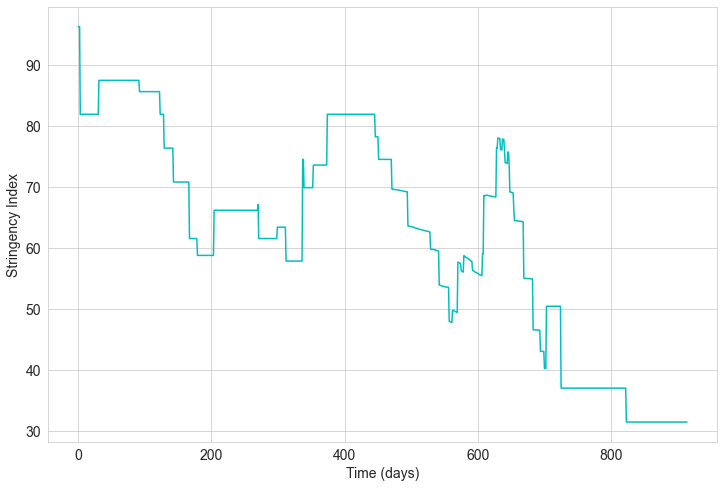

In [18]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
lockdown = list(df['stringency_index'].values / 100)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, lockdown))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['stringency_index'], 'c')
plt.xlabel('Time (days)')
plt.ylabel('Stringency Index')
plt.grid(True)

SIR_with_lockdown_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIR_with_lockdown_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


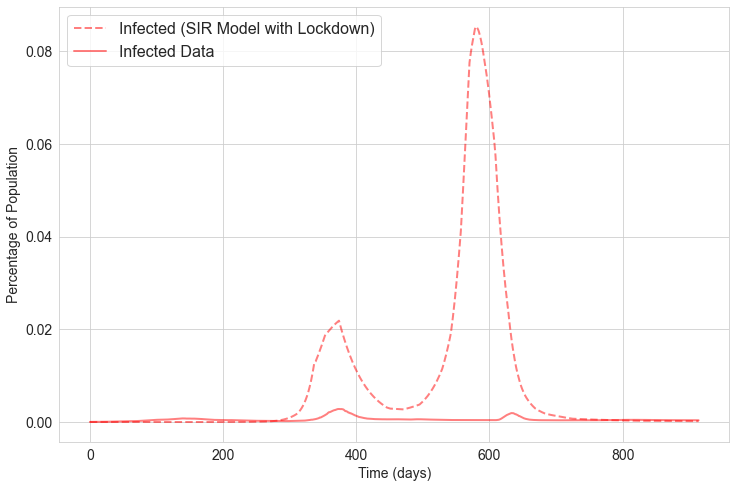

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (SIR Model with Lockdown)')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_with_lockdown_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [20]:
r0 = optimal_beta/optimal_gamma

df["S_modelled_with_lockdown"] = S
df["I_modelled_with_lockdown"] = I
df["R_modelled_with_lockdown"] = R
df["r_eff_modelled_with_lockdown"] = r0 * df["S_modelled_with_lockdown"]/N
df["r_eff_actual_with_lockdown"] = r0 * df["S"]/df["N"]

## SIRV Model Lockdown

In [21]:
def deriv(y, t, N, beta, gamma, nu, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N - nu * S
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I + nu * S
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, lockdown):
    beta, gamma, nu = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, nu, lockdown))
    return result

def objective_function(params, y0, t, N, lockdown):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

In [22]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
# initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.0001
# initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.000001
initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.000001
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


optimal_beta: 0.40897034072952304 optimal_gamma: 0.09196829370123338 optimal_nu: 2.9044029843851936e-05
optimal_beta/optimal_gamma: 4.446862329077204


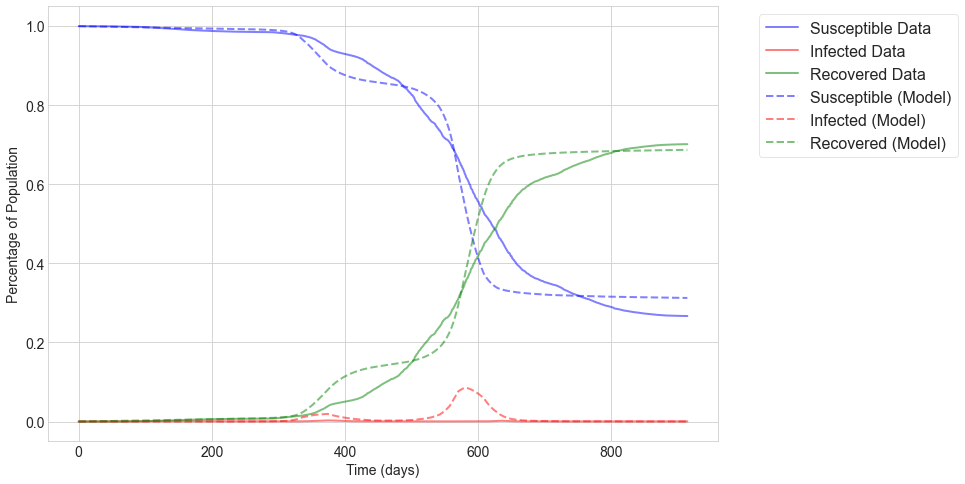

cost: 94636860.38436058


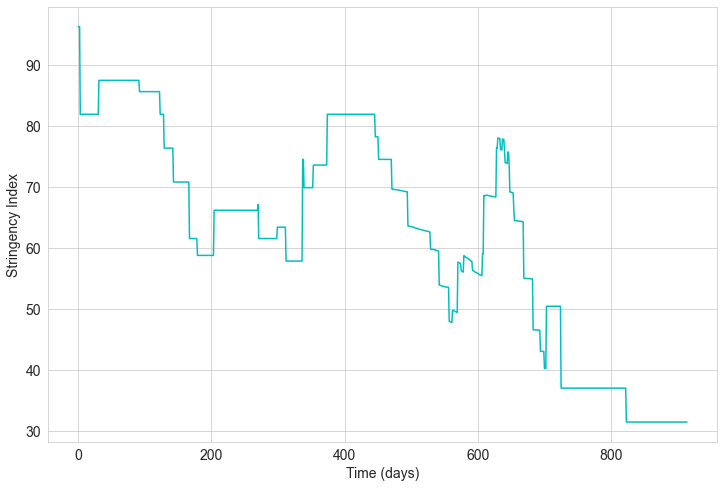

In [23]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu]
lockdown = list(df['stringency_index'].values / 100)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma, optimal_nu = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma} optimal_nu: {optimal_nu}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, optimal_nu, lockdown))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['stringency_index'], 'c')
plt.xlabel('Time (days)')
plt.ylabel('Stringency Index')
plt.grid(True)

SIRV_with_lockdown_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIRV_with_lockdown_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


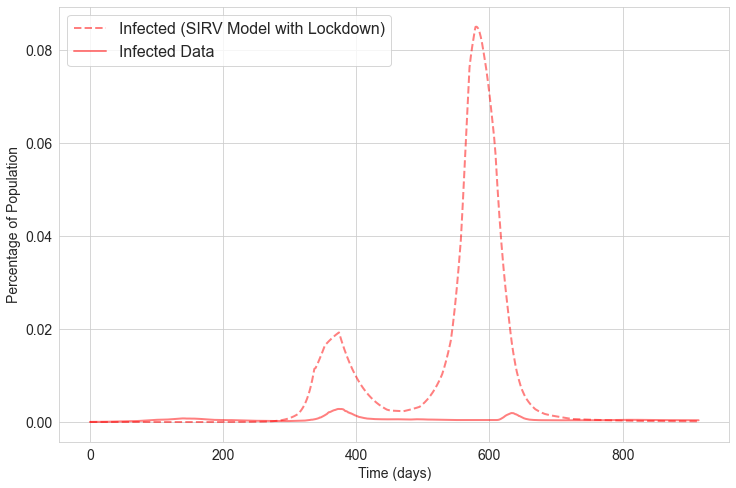

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (SIRV Model with Lockdown)')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [25]:
r0 = optimal_beta/optimal_gamma

df["S_modelled_with_lockdown_with_vaccination"] = S
df["I_modelled_with_lockdown_with_vaccination"] = I
df["R_modelled_with_lockdown_with_vaccination"] = R
df["r_eff_modelled_with_lockdown_with_vaccination"] = r0 * df["S_modelled_with_lockdown_with_vaccination"]/N
df["r_eff_actual_with_lockdown_with_vaccination"] = r0 * df["S"]/df["N"]

In [26]:
optimal_values = {
    'optimal_beta': optimal_beta,
    'optimal_gamma': optimal_gamma,
    'optimal_nu': optimal_nu
}

with open(OPTIMAL_VALUES_FILE, "w") as outfile: 
    json.dump(optimal_values, outfile)

## Vaccination dependent on Time

In [27]:
window_length = 20

def deriv(y, t, N, nu, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -optimal_beta * (1 - lockdown[int(t)]) * S * I / N - nu * S
    dIdt = optimal_beta * (1 - lockdown[int(t)]) * S * I / N - optimal_gamma * I
    dRdt = optimal_gamma * I + nu * S
#     print(dSdt, dIdt, dRdt)
    return dSdt[0], dIdt, dRdt[0]

def integrate_system(params, y0, t, N, lockdown):
    nu = params
    result = odeint(deriv, y0, t, args=(N, nu, lockdown), hmax=1.0)
    return result

def objective_function(params, y0, t, N, lockdown, days_window):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'][days_window-window_length:days_window], S) + 
            compute_cost(df['I'][days_window-window_length:days_window], I) + 
            compute_cost(df['R'][days_window-window_length:days_window], R))
    return cost

In [28]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.001

In [34]:
nu_changing_with_time = []
time_points_for_nu = []
for days_window in range(window_length, days_difference, window_length):
    lockdown = list(df['stringency_index'].values / 100)[days_window - 10:days_window]
    t = np.linspace(days_window - window_length, days_window, window_length)
    initial_guesses = [initial_guess_for_nu]
    result = minimize(
        objective_function,
        initial_guesses,
        args=(y0, t, N, lockdown, days_window),
        method='Nelder-Mead',
    )
    optimal_nu = result.x
    print(f"optimal_nu: {optimal_nu}")
    
    nu_changing_with_time.append(optimal_nu[0])
    time_points_for_nu.append(days_window - window_length)
    N = df.loc[min(df.index), ['N']].item()
    y0 = df.loc[days_window, ['S']].item(), df.loc[days_window, ['I']].item(), df.loc[days_window, ['R']].item()
    initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.001

optimal_nu: [-0.07833444]
optimal_nu: [-2.43484974e-07]
optimal_nu: [4.07218933e-07]
optimal_nu: [1.84783936e-06]
optimal_nu: [7.99455643e-06]
optimal_nu: [7.00564384e-06]
optimal_nu: [-3.88770103e-06]
optimal_nu: [-9.42312479e-06]
optimal_nu: [-8.6126411e-05]
optimal_nu: [-6.2001133e-05]
optimal_nu: [-2.50025302e-05]
optimal_nu: [-2.87252188e-05]
optimal_nu: [-2.68959641e-05]
optimal_nu: [-3.43594193e-05]
optimal_nu: [2.45387256e-06]
optimal_nu: [0.00010706]
optimal_nu: [0.00015083]
optimal_nu: [0.00036796]
optimal_nu: [0.00074174]
optimal_nu: [0.000325]
optimal_nu: [0.00027749]
optimal_nu: [0.00092022]
optimal_nu: [0.00109287]
optimal_nu: [0.00086984]
optimal_nu: [0.00181926]
optimal_nu: [0.00276877]
optimal_nu: [0.00225196]
optimal_nu: [0.0026587]
optimal_nu: [0.00460345]
optimal_nu: [0.00568603]
optimal_nu: [0.00525362]
optimal_nu: [0.00516585]
optimal_nu: [0.00535744]
optimal_nu: [0.00344614]
optimal_nu: [0.00190317]
optimal_nu: [0.0012968]
optimal_nu: [0.002365]
optimal_nu: [0.00

## SIRV model with time varying nu

In [32]:
days_difference

914

In [35]:
print(nu_changing_with_time, time_points_for_nu)

[-0.07833444223105931, -2.434849739100735e-07, 4.0721893310286777e-07, 1.8478393554661528e-06, 7.99455642699937e-06, 7.005643844601907e-06, -3.887701034548512e-06, -9.423124790194275e-06, -8.612641096115394e-05, -6.200113296509066e-05, -2.5002530217173385e-05, -2.8725218772890862e-05, -2.6895964145663083e-05, -3.43594193458584e-05, 2.453872561452177e-06, 0.00010706169009208447, 0.000150831353664396, 0.00036795815229415736, 0.0007417422890663142, 0.00032499999999999825, 0.00027749370336532396, 0.0009202183485031126, 0.001092865079641342, 0.0008698378652334215, 0.0018192601501941705, 0.0027687650918960622, 0.0022519620180130053, 0.002658698499202733, 0.004603451097011576, 0.00568603231310846, 0.005253620648384109, 0.005165853238105788, 0.005357444512844103, 0.0034461376309394913, 0.0019031682491302518, 0.0012968007683753975, 0.0023649950504303027, 0.0018623895883560207, 0.0018266826987266564, 0.0016467702627182025, 0.0014367136955261244, 0.0007643373727798455, 0.0006114518761634817, 0.00

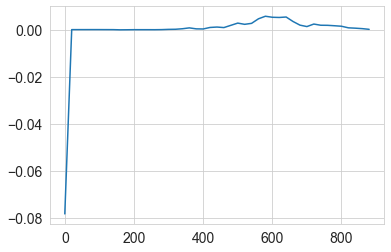

In [37]:
plt.plot(time_points_for_nu, nu_changing_with_time)

In [41]:
new_time_points = np.arange(0, 915, 1)  # Adjust the range and step size as needed

# Interpolate nu_changing_with_time to match the new time points
interpolated_nu = np.interp(new_time_points, time_points_for_nu, nu_changing_with_time)

# Print the interpolated nu array and its length
print(len(interpolated_nu))

915


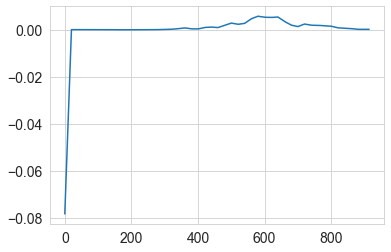

In [42]:
plt.plot(new_time_points, interpolated_nu)

In [43]:
df['nu_varying_with_time'] = interpolated_nu

In [45]:
def deriv(y, t, N, beta, gamma, nu_varying, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N - nu_varying[int(t)] * S
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I + nu_varying[int(t)] * S
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, nu_varying, lockdown):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, nu_varying, lockdown))
    return result

def objective_function(params, y0, t, N, nu_varying, lockdown):
    predictions = integrate_system(params, y0, t, N, nu_varying, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

In [46]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.2, 1./10
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

optimal_beta: 0.726033950602631 optimal_gamma: 0.4160127822647247
optimal_beta/optimal_gamma: 1.7452202950356175


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


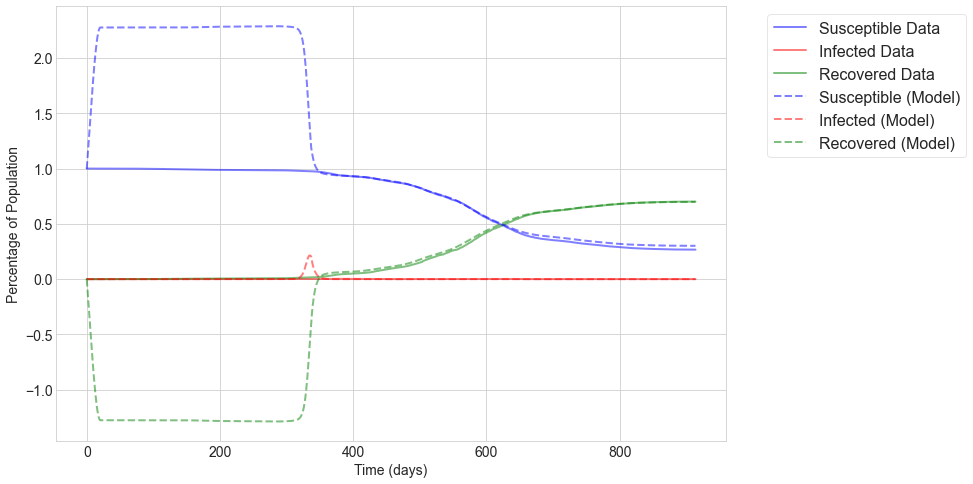

cost: 1326011815.4669323


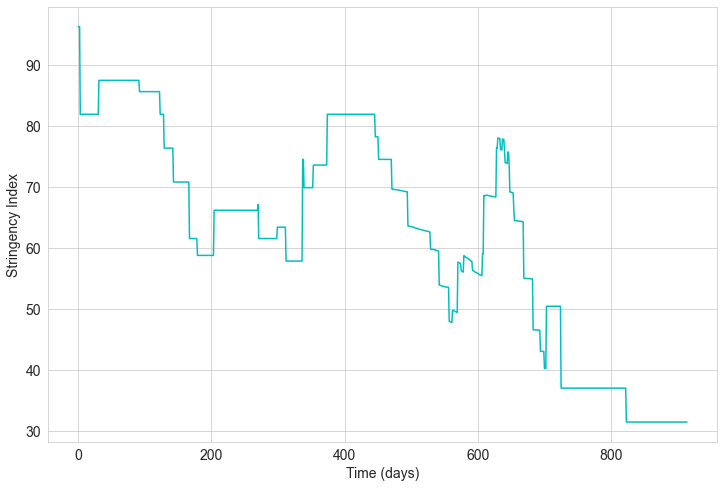

In [47]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
lockdown = list(df['stringency_index'].values / 100)
nu_varying = list(df['nu_varying_with_time'].values)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, nu_varying, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, nu_varying, lockdown))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, 'b', alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, 'g', alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, 'b--', alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, 'g--', alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['stringency_index'], 'c')
plt.xlabel('Time (days)')
plt.ylabel('Stringency Index')
plt.grid(True)

SIRV_with_lockdown_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIRV_with_lockdown_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


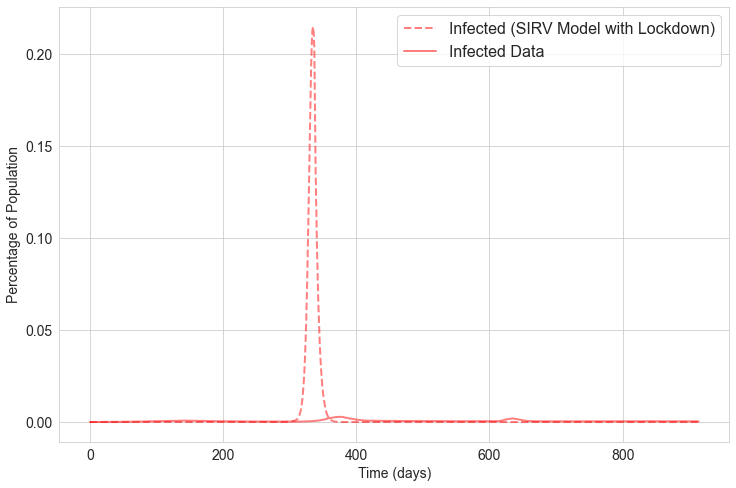

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(t, I/N, 'r--', alpha=0.5, lw=2, label='Infected (SIRV Model with Lockdown)')
plt.plot(t, df['I']/N, 'r', alpha=0.5, lw=2, label='Infected Data')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

## Comparing costs

In [ ]:
print(SIR_cost - SIRV_with_lockdown_cost)
print(SIR_with_lockdown_cost - SIRV_with_lockdown_cost)

In [ ]:
stringency_data_points = np.arange(0, 100, 0.5)
fit_line_loaded = np.poly1d(np.load(STRINGENCY_BASED_GDP))
predicted_gdp = fit_line_loaded(stringency_data_points)
MIN_GDP = min(predicted_gdp)
MAX_GDP = max(predicted_gdp)

In [ ]:
df['gdp_min_max_normalized'] = (df['gdp_normalized'] - MIN_GDP) / (MAX_GDP - MIN_GDP)
df['gdp_normalized_modelled_min_max_normalized'] =  (df['gdp_normalized_modelled'] - MIN_GDP) / (MAX_GDP - MIN_GDP)

In [ ]:
df.to_csv(os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_merged_data.csv"))

In [ ]:
df.diff()['stringency_index'][1:].describe()

In [ ]:
df['stringency_index'].describe()

In [ ]:
actions_taken = []
# "output/actions_taken/-14154.05.txt"
with open("output/actions_taken/-209965.53.txt", "r") as f:
    for line in f:
        actions_taken.append(int(line.strip()))
start_stringency = 0.0
current_stringency_index = start_stringency
stringency_index_from_actions_taken = [current_stringency_index]
# stringency_index_from_actions_taken = []
diff_list = []
for action in actions_taken:
    reward_inertia_flag = False
    if action == 0:
        current_stringency_index = max(0, current_stringency_index - 10)
        diff = -10
    elif action == 1:
        current_stringency_index = max(0, current_stringency_index - 5)
        diff = -5
    elif action == 2:
        current_stringency_index = max(0, current_stringency_index - 2.5)
        diff = -2.5
    elif action == 3:
        current_stringency_index = max(0, current_stringency_index + 0)
        diff = 0
    elif action == 4:
        current_stringency_index = min(100, current_stringency_index + 2.5)
        diff = 2.5
    elif action == 5:
        current_stringency_index = min(100, current_stringency_index + 5)
        diff = 5
    elif action == 6:
        current_stringency_index = min(100, current_stringency_index + 10)
        diff = 10
    stringency_index_from_actions_taken.append(current_stringency_index)
    diff_list.append(diff)

# stringency_index_from_actions_taken = stringency_index_from_actions_taken + [0]
stringency_index_from_actions_taken = np.array(stringency_index_from_actions_taken)
stringency_index_from_actions_taken = stringency_index_from_actions_taken[:916]
# the below is a checking mechanism
# stringency_index_from_actions_taken = np.array([0] + list(df['stringency_index']))

In [ ]:
def calculate_reward_weighted(gdp_min_max_normalized_list, r_eff_list):
    GDP_WEIGHT_1 = 10 # change this value and see how it affects the reward
    GDP_WEIGHT_2 = 20 # change this value and see how it affects the reward
    reward = []
    for i in range(len(gdp_min_max_normalized_list)):
        if r_eff_list[i] > 1.9:
            reward.append(-20 * r_eff_list[i])
        elif r_eff_list[i] <= 1.9 and r_eff_list[i] >= 1.5:
            reward.append(GDP_WEIGHT_1 * gdp_min_max_normalized_list[i])
        else:
            reward.append(GDP_WEIGHT_2 * gdp_min_max_normalized_list[i])
    return reward

In [ ]:
def reward_strategy(stringency_moves, reward_strategy_choosen, sir_technique):   
    N = df.loc[min(df.index), ['N']].item()
    y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
    days_difference = (max(df['date']) - min(df['date'])).days
    t = np.linspace(0, days_difference, days_difference + 1)
    
    stringency_index_random_choice = []
    store_S = np.zeros(days_difference + 1)
    store_I = np.zeros(days_difference + 1)
    store_R = np.zeros(days_difference + 1)

    # sir_technique 1 is faster
    # 2 is just to check whether the results match with 1
    moves_lockdown = stringency_index_from_actions_taken / 100
    if sir_technique == 1:
        moves_ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, optimal_nu, moves_lockdown))
        moves_S, moves_I, moves_R = moves_ret.T

        df["S_moves"] = moves_S
        df["I_moves"] = moves_I
        df["R_moves"] = moves_R
    elif sir_technique == 2:
        for ith_day in range(days_difference + 1):
            stringency_index_random_choice.append(stringency_index_from_actions_taken[ith_day])
            t = np.linspace(0, ith_day, ith_day + 1)
            moves_ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, optimal_nu, np.array(stringency_index_random_choice) / 100))
            moves_S, moves_I, moves_R = moves_ret.T
            store_S[ith_day] = moves_S[-1]
            store_I[ith_day] = moves_I[-1]
            store_R[ith_day] = moves_R[-1]
        df["S_moves"] = store_S
        df["I_moves"] = store_I
        df["R_moves"] = store_R
    
    df["r_eff_moves_with_lockdown_with_vaccination"] = r0 * df["S_moves"] / N
    df["gdp_normalized_moves_min_max_normalized"] = ((fit_line_loaded(stringency_index_from_actions_taken) - MIN_GDP) / (MAX_GDP - MIN_GDP))[1:]
    
    modelled_ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, optimal_nu, (df['stringency_index']) / 100))
    modelled_S, modelled_I, modelled_R = modelled_ret.T
    
    df["S_modelled_with_lockdown_with_vaccination_with_vaccination_with_vaccination_inside_plot"] = modelled_S
    df["I_modelled_with_lockdown_with_vaccination_with_vaccination_inside_plot"] = modelled_I
    df["R_modelled_with_lockdown_with_vaccination_inside_plot"] = modelled_R
    
    plt.figure(figsize=(10, 6))
    plt.plot(df["S_modelled_with_lockdown_with_vaccination_with_vaccination_with_vaccination_inside_plot"], color='b', label='S_modelled')
    plt.plot(df["I_modelled_with_lockdown_with_vaccination_with_vaccination_inside_plot"], color='r', label='I_modelled')
    plt.plot(df["R_modelled_with_lockdown_with_vaccination_inside_plot"], color='g', label='R_modelled')
    plt.plot(df["S_moves"], 'b--', label='S_moves')
    plt.plot(df["I_moves"], 'r--', label='I_moves')
    plt.plot(df["R_moves"], 'g--', label='R_moves')
    plt.xlabel('days')
    plt.ylabel('Population')
    plt.title('SIR_dynamics')
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['stringency_index'], color='b', label='actual')
    plt.plot(stringency_index_from_actions_taken , color='g', label='moves')
    plt.xlabel('days')
    plt.ylabel('stringency')
    plt.title('stringency')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['r_eff_actual_with_lockdown_with_vaccination'], color='b', label='actual')
    plt.plot(df['r_eff_modelled_with_lockdown_with_vaccination'], color='r', label='modelled')
    plt.plot(df['r_eff_moves_with_lockdown_with_vaccination'], color='g', label='moves')
    plt.xlabel('days')
    plt.ylabel('r_eff')
    plt.title('R_eff')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df['gdp_min_max_normalized'], color='b', label='actual')
    plt.plot(df['gdp_normalized_modelled_min_max_normalized'], color='r', label='modelled')
    plt.plot(df['gdp_normalized_moves_min_max_normalized'], color='g', label='moves')
    plt.xlabel('days')
    plt.ylabel('gdp')
    plt.title('GDP')
    plt.legend()
    plt.show()
        
    if reward_strategy_choosen == 1:
        plt.figure(figsize=(10, 6))
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_with_lockdown_with_vaccination"], color='b', label='reward(actual) = {reward}'.format(reward = np.sum(df['gdp_min_max_normalized'] / df['r_eff_actual_with_lockdown_with_vaccination'])))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_with_lockdown_with_vaccination"], color='r', label='reward(modelled) = {reward}'.format(reward = np.sum(df['gdp_normalized_modelled_min_max_normalized'] / df['r_eff_modelled_with_lockdown_with_vaccination'])))
        plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown_with_vaccination"], color='g', label='reward(modelled) = {reward}'.format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown_with_vaccination"])))
        plt.xlabel('days')
        plt.ylabel('reward')
        plt.title('reward')
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_with_lockdown_with_vaccination"], color='b', label='reward(actual) = {reward}'.format(reward = np.sum(df['gdp_min_max_normalized'] / df['r_eff_actual_with_lockdown_with_vaccination'])))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_with_lockdown_with_vaccination"], color='r', label='reward(modelled) = {reward}'.format(reward = np.sum(df['gdp_normalized_modelled_min_max_normalized'] / df['r_eff_modelled_with_lockdown_with_vaccination'])))
        # plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"], color='g', label='reward(modelled) = {reward}'.format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"])))
        plt.xlabel('days')
        plt.ylabel('reward')
        plt.title('reward')
        plt.legend()
        plt.show()
        
    if reward_strategy_choosen == 2:
        plt.figure(figsize=(10, 6))
        
        index_to_the_power_of = 0.001
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_with_lockdown_with_vaccination"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color='b', label='reward(actual) = {reward}'.format(reward = np.sum(df['gdp_min_max_normalized'] / df['r_eff_actual_with_lockdown_with_vaccination'] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_with_lockdown_with_vaccination"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color='r', label='reward(modelled) = {reward}'.format(reward = np.sum(df['gdp_normalized_modelled_min_max_normalized'] / df['r_eff_modelled_with_lockdown_with_vaccination'] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown_with_vaccination"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color='g', label='reward(moves) = {reward}'.format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown_with_vaccination"] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.xlabel('days')
        plt.ylabel('reward')
        plt.title('reward')
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_with_lockdown_with_vaccination"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color='b', label='reward(actual) = {reward}'.format(reward = np.sum(df['gdp_min_max_normalized'] / df['r_eff_actual_with_lockdown_with_vaccination'] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_with_lockdown_with_vaccination"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color='r', label='reward(modelled) = {reward}'.format(reward = np.sum(df['gdp_normalized_modelled_min_max_normalized'] / df['r_eff_modelled_with_lockdown_with_vaccination'] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        # plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color='g', label='reward(moves) = {reward}'.format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.xlabel('days')
        plt.ylabel('reward')
        plt.title('reward')
        plt.legend()
        plt.show()
        
    if reward_strategy_choosen == 3:
        
        # we need the epidemic to happen and also the I population to stay below a certain value (beds in the hospital) (10 multiple)
        # we need r_eff to be below 1 at an earlier stage (1 multiple)
        # we need to reward inertia by a small amount (0.1 multiple)
        
        hospital_capacity = 0.082
        hospital_capacity_reward = -5000
        # reward_I_percentage = -100 if self.I_proportion >= 0.082 else 0
        I_reward_actual = [hospital_capacity_reward if I_percentage >= hospital_capacity else 0 for I_percentage in df["I"] / df["N"]]
        I_reward_modelled = [hospital_capacity_reward if I_percentage >= hospital_capacity else 0 for I_percentage in df["I_modelled_with_lockdown_with_vaccination"] / N]
        I_reward_moves = [hospital_capacity_reward if I_percentage >= hospital_capacity else 0 for I_percentage in df["I_moves"] / N]
        
        r_eff_reward_choosen = 1
        r_eff_punishment_choosen = -1
        r_eff_level = 1.9
        r_eff_reward_actual = [r_eff_reward_choosen if r_eff <= r_eff_level else r_eff_punishment_choosen for r_eff in df["r_eff_actual_with_lockdown_with_vaccination"]]
        r_eff_reward_modelled = [r_eff_reward_choosen if r_eff <= r_eff_level else r_eff_punishment_choosen for r_eff in df["r_eff_modelled_with_lockdown_with_vaccination"]]
        r_eff_reward_moves = [r_eff_reward_choosen if r_eff <= r_eff_level else r_eff_punishment_choosen for r_eff in df["r_eff_moves_with_lockdown_with_vaccination"]]
        
        inertia_rewards_actual = [0] + [abs(diff)*2*-1 for diff in (df['stringency_index'][i] - df['stringency_index'][i - 1] for i in range(1, len(df)))]
        # modelled reward for intertia is same as actual
        inertia_rewards_modelled = [0] + [abs(diff)*2*-1 for diff in (df['stringency_index'][i] - df['stringency_index'][i - 1] for i in range(1, len(df)))]
        inertia_rewards_moves = [abs(diff)*2*-1 for diff in (stringency_index_from_actions_taken[i] - stringency_index_from_actions_taken[i - 1] for i in range(1, len(stringency_index_from_actions_taken)))]
        
        # index_to_the_power_of = 0.00001
        # reward_actual = (df["gdp_min_max_normalized"] / df["r_eff_actual_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of)) + I_reward_actual + r_eff_reward_actual + inertia_rewards_actual
        # reward_modelled = (df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of)) + I_reward_modelled + r_eff_reward_modelled + inertia_rewards_modelled
        # reward_moves = (df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of)) + I_reward_moves + r_eff_reward_moves + inertia_rewards_moves
        
        # TODO try this...
        """
        def calculate_reward(gdp_normalized, r_eff_actual):
            GDP_WEIGHT = 0.35 # change this value and see how it affects the reward
            if r_eff_actual > 1:
                # When r_eff > 1, the reward is more heavily influenced by the reduction in r_eff
                return gdp_normalized / (5 * r_eff_actual)
            else:
                # When r_eff <= 1, the reward is more heavily influenced by the increase in GDP
                return GDP_WEIGHT * gdp_normalized
        """
        
        reward_actual = calculate_reward_weighted(df["gdp_min_max_normalized"], df["r_eff_actual_with_lockdown_with_vaccination"]) + I_reward_actual + r_eff_reward_actual + inertia_rewards_actual
        reward_modelled = calculate_reward_weighted(df["gdp_normalized_modelled_min_max_normalized"], df["r_eff_modelled_with_lockdown_with_vaccination"]) + I_reward_modelled + r_eff_reward_modelled + inertia_rewards_modelled
        reward_moves = calculate_reward_weighted(df["gdp_normalized_moves_min_max_normalized"], df["r_eff_moves_with_lockdown_with_vaccination"]) + I_reward_moves + r_eff_reward_moves + inertia_rewards_moves
        
        rl_reward_moves = reward_moves
        rl_reward_weighted = calculate_reward_weighted(df["gdp_normalized_moves_min_max_normalized"], df["r_eff_moves_with_lockdown_with_vaccination"])
        rl_reward_I_percentage = I_reward_moves
        rl_reward_r_eff = r_eff_reward_moves
        rl_reward_inertia = inertia_rewards_moves

        plt.plot(reward_actual, color='b', label='reward(actual) = {reward}'.format(reward = np.sum(reward_actual)))
        plt.plot(reward_modelled, color='r', label='reward(modelled) = {reward}'.format(reward = np.sum(reward_modelled)))
        plt.plot(reward_moves, color='g', label='reward(moves) = {reward}'.format(reward = np.sum(reward_moves)))
        plt.xlabel('days')
        plt.ylabel('reward')
        plt.title('reward')
        plt.legend()
        plt.show()
        
        return rl_reward_moves, rl_reward_weighted, rl_reward_I_percentage, rl_reward_r_eff, rl_reward_inertia

In [ ]:
rl_reward_moves, rl_reward_weighted, rl_reward_I_percentage, rl_reward_r_eff, rl_reward_inertia = reward_strategy(stringency_index_from_actions_taken, reward_strategy_choosen=3, sir_technique=1)